In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
path = './input_X_maz/'
#file = '469-0-562-60-120_Ch32'
#file = '120deg-10x75'
file = 'Axxis_Full'
#file = 'Axxis_Survey_10Swaths'
filename = path + file +'.txt'

In [3]:
#f = open(filename)
#lines = f.read().splitlines()
#f.close()
#for i, line in enumerate(lines):
#    if i < 10:
#        print(i, line)

In [4]:
column_names = ['ShotNo', 'StrNo', 'RecNo', 'Offset', 'MidPtX', 'MidPtY', 'DipSrc', 'DipRec', 'AzSrc']

In [5]:
rowstoskip = 2

In [6]:
df_raw = pd.read_csv(filename, names=column_names, usecols=['Offset', 'MidPtX', 'MidPtY', 'AzSrc'], skiprows=rowstoskip, delim_whitespace=True)

In [7]:
len(df_raw)

56422118

In [8]:
print(df_raw['MidPtX'].min())
print(df_raw['MidPtX'].max())
print(df_raw['MidPtY'].min())
print(df_raw['MidPtY'].max())



4975.0
15002.5
10162.5
15837.5


In [9]:
#mx_min, mx_max = 12000, 13000
#my_min, my_max = 12000, 13000
mx_min, mx_max = 9500, 10450
#my_min, my_max = 12500, 13500
#my_min, my_max = 12537.5, 13437.5
#my_min, my_max = 12512.5, 13487.5
my_min, my_max = 12862.5, 13137.5

In [10]:
df_filt = df_raw[(df_raw['MidPtX'] >= mx_min) & (df_raw['MidPtY'] >= my_min) & (df_raw['MidPtX'] <= mx_max) & (df_raw['MidPtY'] <= my_max)]
#df_filt = df_raw

In [11]:
len(df_filt)

1031109

In [12]:
df_filt['OffsetY'] = df_filt.apply(lambda row: row.Offset*np.cos(np.deg2rad(row.AzSrc)), axis=1)
df_filt['OffsetX'] = df_filt.apply(lambda row: row.Offset*np.sin(np.deg2rad(row.AzSrc)), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
df_filt.head()

,Offset,MidPtX,MidPtY,AzSrc,OffsetY,OffsetX
2836359,9130.79,9512.5,12862.5,177.960,-9125.003079,325.030508
2836360,9185.75,9540.0,12862.5,177.972,-9179.996529,325.064283
2836361,9240.72,9567.5,12862.5,177.984,-9235.000385,325.075388
2836362,9295.68,9595.0,12862.5,177.996,-9289.994652,325.063118
2836363,9350.65,9622.5,12862.5,178.008,-9344.999310,325.028174


In [14]:
df_filt['MidPtY'].max()

13137.5

In [15]:
#binsize_x = 12.5
#binsize_y = 12.5
binsize_x = 25
binsize_y = 25
#x_min, x_max = 9000, 16000
#y_min, y_max = 9000, 16000
#x_min, x_max = 12000, 13000
#y_min, y_max = 12000, 13000
x_min, x_max = 9500, 10475
#y_min, y_max = 12512.5, 13537.5
y_min, y_max = 12862.5, 13187.5
#xx, yy = np.meshgrid(np.arange(x_min, x_max, binsize_x),np.arange(y_min, y_max, binsize_y))
xx = np.arange(x_min, x_max, binsize_x)
yy = np.arange(y_min, y_max, binsize_y)

offset_binsize = 25
offset_min, offset_max = 0, 500
offset_bin = np.arange(offset_min, offset_max, offset_binsize)

In [16]:
yy

array([12862.5, 12887.5, 12912.5, 12937.5, 12962.5, 12987.5, 13012.5,
       13037.5, 13062.5, 13087.5, 13112.5, 13137.5, 13162.5])

In [17]:
xx.shape

(39,)

In [18]:
ret_fold = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], None, 'count', bins=[xx,yy])

In [19]:
print(ret_fold.x_edge)

[ 9500.  9525.  9550.  9575.  9600.  9625.  9650.  9675.  9700.  9725.
  9750.  9775.  9800.  9825.  9850.  9875.  9900.  9925.  9950.  9975.
 10000. 10025. 10050. 10075. 10100. 10125. 10150. 10175. 10200. 10225.
 10250. 10275. 10300. 10325. 10350. 10375. 10400. 10425. 10450.]


In [20]:
#ret.statistic

In [21]:
def fold_plot(data, title, incx, incy, zeroisnan=False, minval=0, maxval=0):
    if zeroisnan:
        data[data==0] = np.nan
    sns.set_style('dark')
    f, ax = plt.subplots(figsize=(18, 12))
    if minval == 0 and maxval == 0:
        ax = sns.heatmap(data, cmap='jet')
    else:
        ax = sns.heatmap(data, cmap='jet', vmin=minval, vmax=maxval)
    ax.invert_yaxis()
    plt.title(title)
    plt.xlabel('Bin East (inc: '+ str(incx)+'m)')
    plt.ylabel('Bin North (inc: '+ str(incy)+'m)');

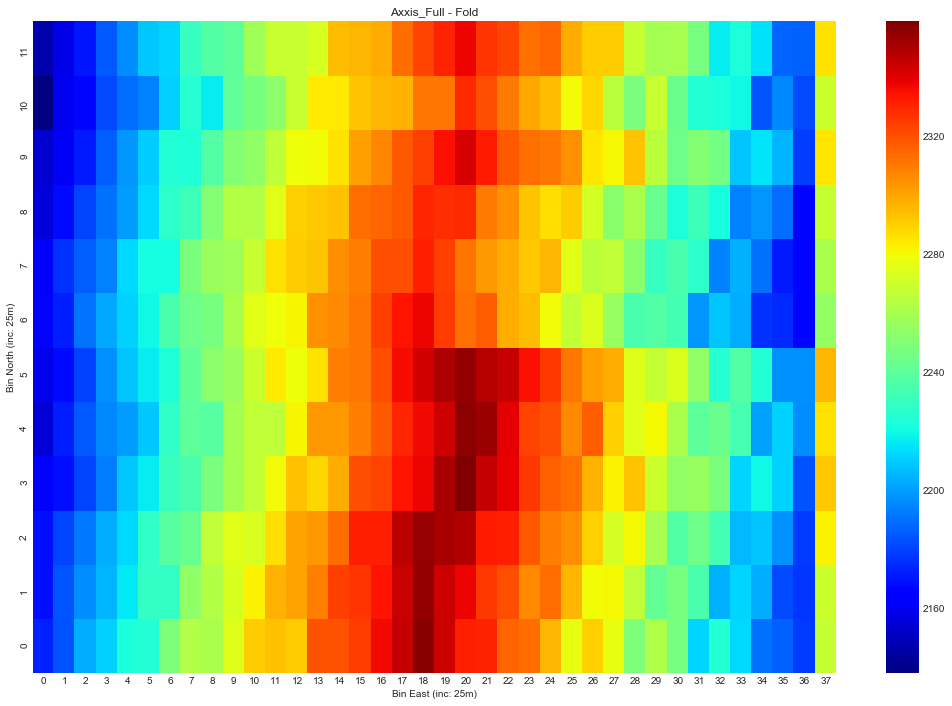

In [22]:
fold_plot(ret_fold.statistic.T, file+' - Fold', binsize_x, binsize_y, zeroisnan=True)

In [23]:
ret_fold.statistic.max()

2359.0

In [24]:
ret_minoffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], df_filt['Offset'], statistic='min', bins=[xx,yy])

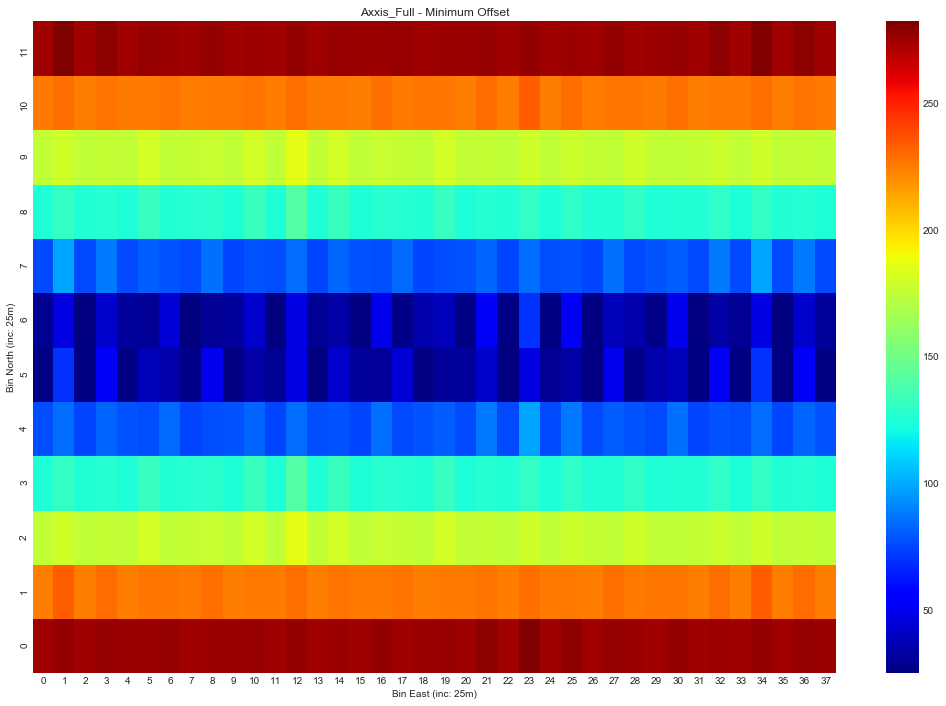

In [25]:
fold_plot(ret_minoffs.statistic.T, file+' - Minimum Offset', binsize_x, binsize_y)

In [26]:
ret_maxoffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], df_filt['Offset'], statistic='max', bins=[xx,yy])

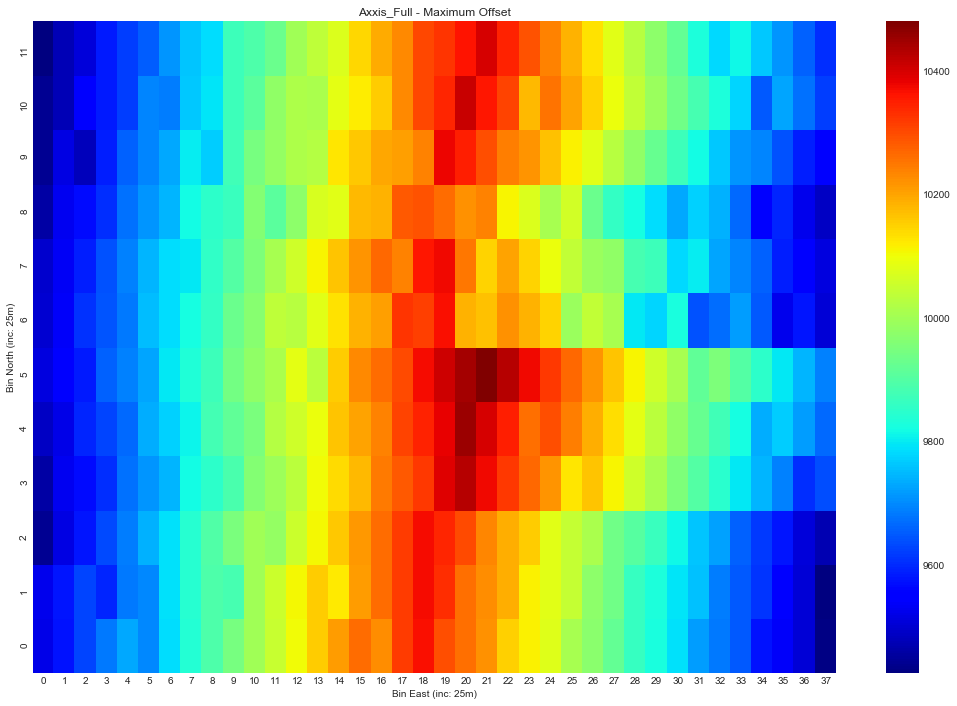

In [27]:
fold_plot(ret_maxoffs.statistic.T, file+' - Maximum Offset', binsize_x, binsize_y)

In [28]:
ret_maxinloffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], abs(df_filt['OffsetY']), statistic='max', bins=[xx,yy])

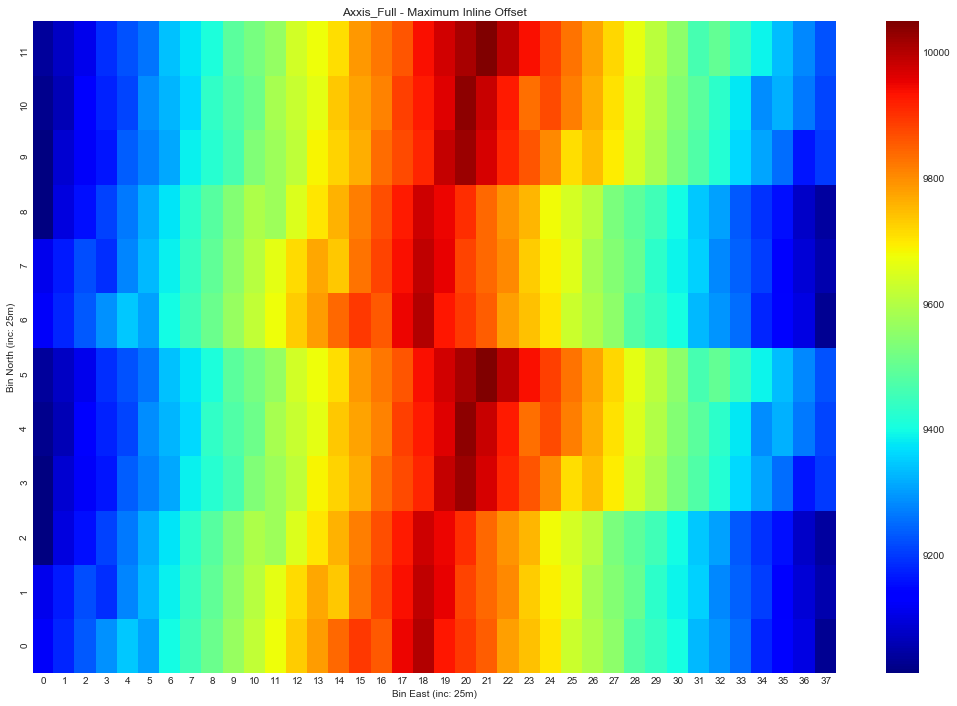

In [29]:
fold_plot(ret_maxinloffs.statistic.T, file+' - Maximum Inline Offset', binsize_x, binsize_y)

In [30]:
ret_mininloffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], abs(df_filt['OffsetY']), statistic='min', bins=[xx,yy])

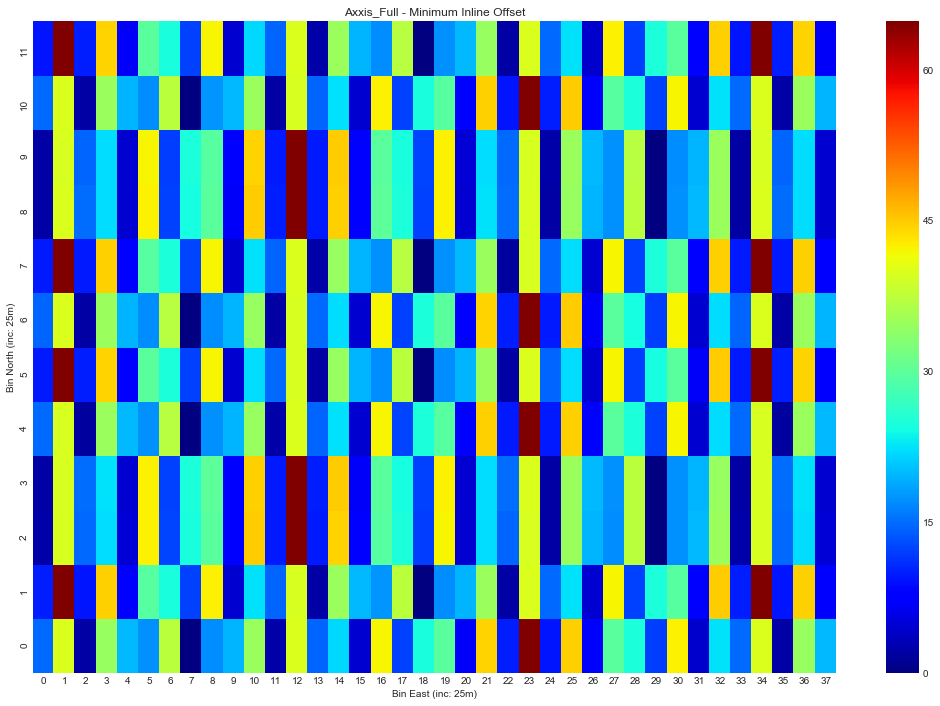

In [31]:
fold_plot(ret_mininloffs.statistic.T, file+' - Minimum Inline Offset', binsize_x, binsize_y, zeroisnan=False)

In [32]:
ret_maxxloffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], abs(df_filt['OffsetX']), statistic='max', bins=[xx,yy])

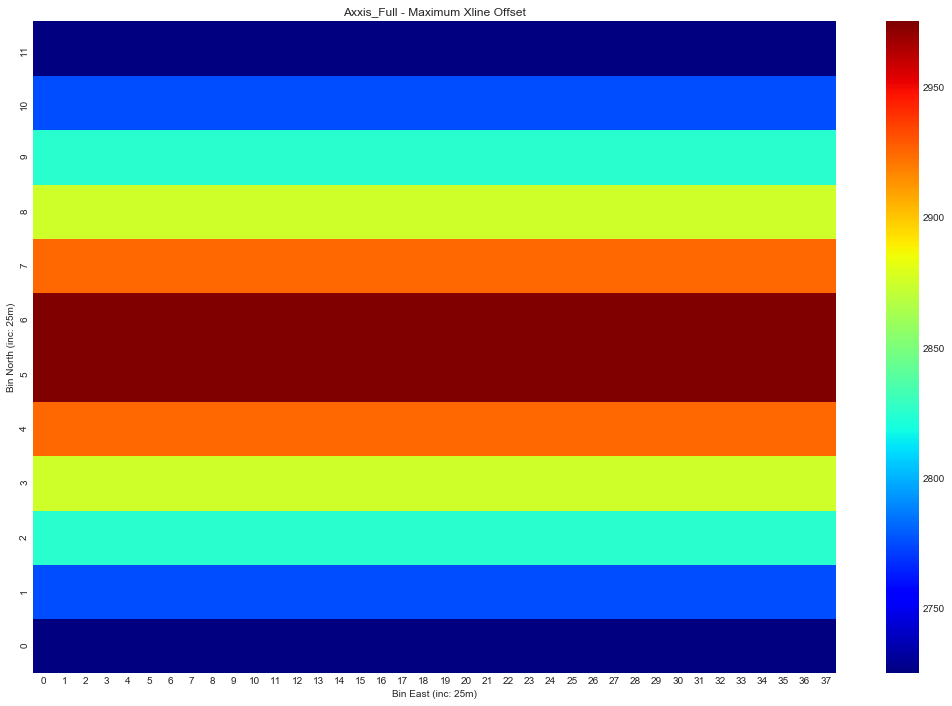

In [33]:
fold_plot(ret_maxxloffs.statistic.T, file+' - Maximum Xline Offset', binsize_x, binsize_y)

In [34]:
ret_minxloffs = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['MidPtY'], abs(df_filt['OffsetX']), statistic='min', bins=[xx,yy])

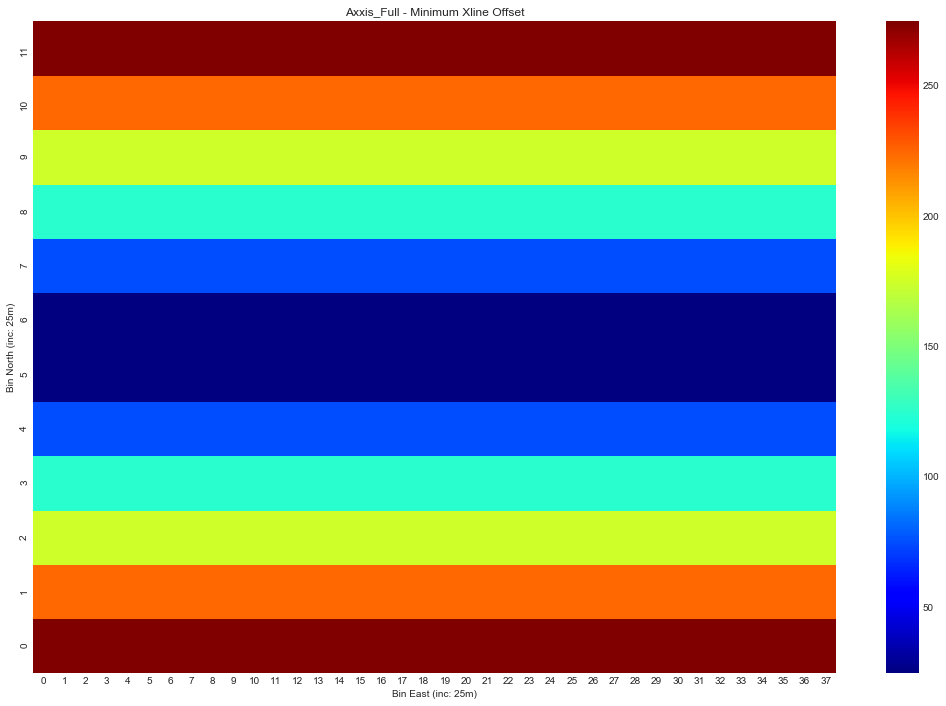

In [35]:
fold_plot(ret_minxloffs.statistic.T, file+' - Minimum Xline Offset', binsize_x, binsize_y, zeroisnan=False)

In [36]:
ret_minxloffs.statistic.max()

274.80623408037536

In [37]:
ret_inlineoffs_count = stats.binned_statistic_2d(df_filt['MidPtX'], df_filt['OffsetY'], None, statistic='count', bins=[xx,offset_bin])

In [38]:
def fold_plot_offset(data, title, incx, incy):
    data[data==0] = np.nan
    sns.set_style('dark')
    f, ax = plt.subplots(figsize=(18, 12))
    pal = sns.color_palette('Reds')
    x_ticks = np.linspace(0, 120, 7)
    
    #ax = sns.heatmap(data, cmap=pal, linewidths=0.1, cbar_kws={"ticks":x_ticks})
    ax = sns.heatmap(data, cmap=pal, vmin=0, vmax=120, linewidths=0.1, cbar_kws={"ticks":x_ticks})
    plt.xlabel('Bin East (inc: '+ str(incx)+'m)')
    plt.ylabel('Offset class (inc: ' + str(incy) + 'm)')
    plt.title(title);

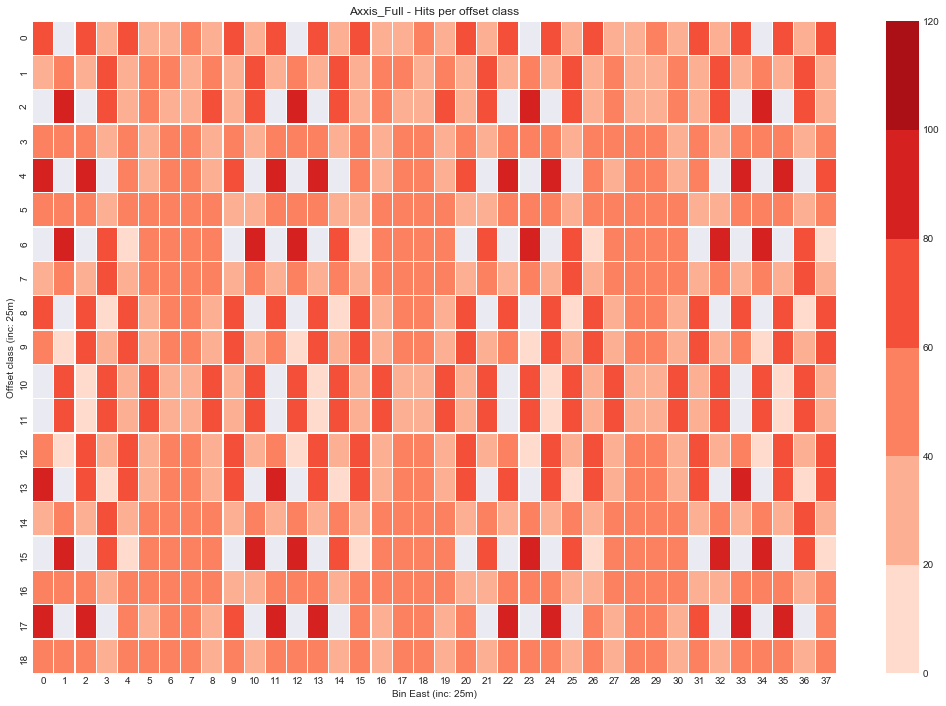

In [39]:
fold_plot_offset(ret_inlineoffs_count.statistic.T, file+' - Hits per offset class', binsize_x, offset_binsize)

In [40]:
ret_inlineoffs_count.statistic.max()

nan

In [41]:
xline_binsize = 25
xline_min, xline_max = -650, 675
xline_bin = np.arange(xline_min, xline_max, xline_binsize)

In [42]:
xline_bin

array([-650, -625, -600, -575, -550, -525, -500, -475, -450, -425, -400,
       -375, -350, -325, -300, -275, -250, -225, -200, -175, -150, -125,
       -100,  -75,  -50,  -25,    0,   25,   50,   75,  100,  125,  150,
        175,  200,  225,  250,  275,  300,  325,  350,  375,  400,  425,
        450,  475,  500,  525,  550,  575,  600,  625,  650])

In [43]:
ret_xline_inlineoffs_count = stats.binned_statistic_2d(df_filt['OffsetX'], df_filt['OffsetY'], None, statistic='count', bins=[xline_bin,offset_bin])

In [44]:
def fold_plot_xline_offset(data, title, incx, incy):
    data[data==0] = np.nan
    sns.set_style('dark')
    f, ax = plt.subplots(figsize=(18, 12))
    pal = sns.color_palette('Reds')
    x_ticks = np.linspace(0, 120, 7)
    
    #ax = sns.heatmap(data, cmap=pal, linewidths=0.1, cbar_kws={"ticks":x_ticks})
    ax = sns.heatmap(data, cmap=pal, vmin=0, vmax=120, linewidths=0.1, cbar_kws={"ticks":x_ticks})
    plt.xlabel('Xline (inc: '+ str(incx)+'m)')
    plt.ylabel('Offset class (inc: ' + str(incy) + 'm)')
    plt.title(title);

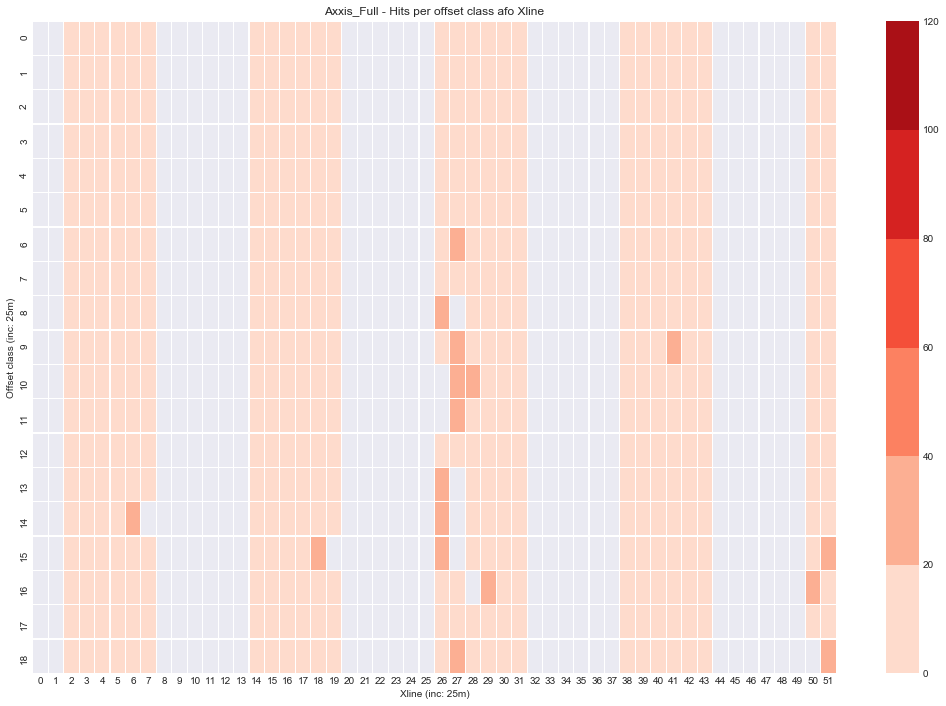

In [45]:
fold_plot_xline_offset(ret_xline_inlineoffs_count.statistic.T, file+' - Hits per offset class afo Xline', xline_binsize, offset_binsize)

In [46]:
df_filt['OffsetX'].max()

2825.426615095315

In [47]:
ret_xline_absoffs_count = stats.binned_statistic_2d(df_filt['OffsetX'], df_filt['Offset'], None, statistic='count', bins=[xline_bin,offset_bin])

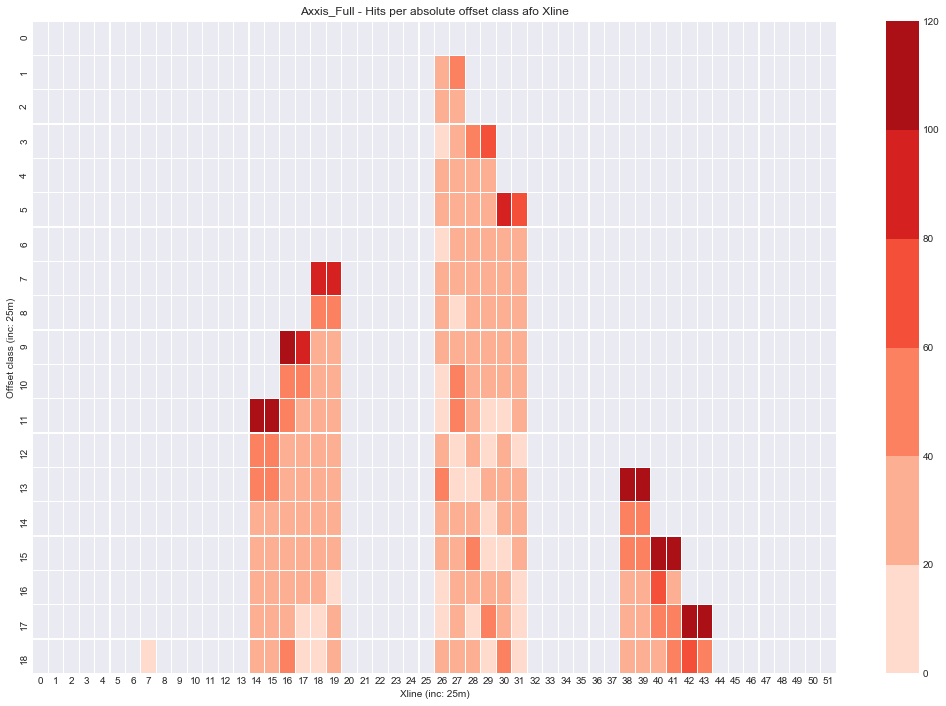

In [48]:
fold_plot_xline_offset(ret_xline_absoffs_count.statistic.T, file+' - Hits per absolute offset class afo Xline', xline_binsize, offset_binsize)

In [49]:
stop

NameError: name 'stop' is not defined

In [ ]:
x = [0.1, 0.1, 0.1, 0.6]
y = [2.1, 2.6, 2.1, 2.1]
binx = [0.0, 0.5, 1.0, 1.5]
biny = [2.0, 2.5, 3.0]
ret = stats.binned_statistic_2d(x, y, None, 'count', bins=[binx,biny])

In [ ]:
fold_plot(ret.statistic.T)